In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('nba_2013.csv')
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [4]:
df.shape

(481, 31)

In [5]:
# To find missing features

missing_feat = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print(missing_feat)

['fg.', 'x3p.', 'x2p.', 'efg.', 'ft.']


In [6]:
# The missing percentage for each of the missing feature

for feature in missing_feat:
    print('{} is {} % missing values'.format(feature,np.round(df[feature].isnull().mean(),4)))

fg. is 0.0042 % missing values
x3p. is 0.1393 % missing values
x2p. is 0.0062 % missing values
efg. is 0.0042 % missing values
ft. is 0.0416 % missing values


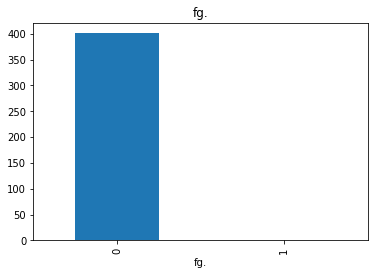

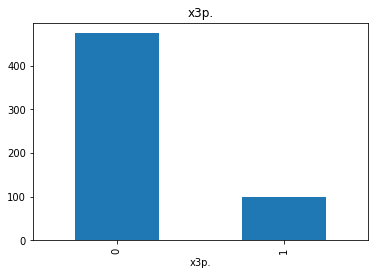

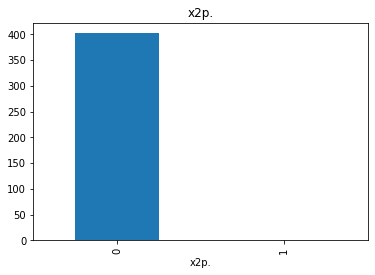

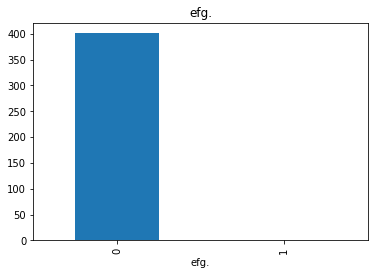

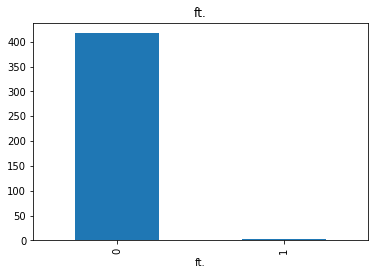

In [7]:
# Relationship with missing values with the dependent feature

for feature in missing_feat:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(),1,0)
    data.groupby(feature)['pts'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [8]:
# Here the relationship with missing and non-missing data is clearly visible so we will take care of the same in Feature Engineering stage

In [9]:
df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [10]:
# Numerical Features

numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print(numerical_features)

['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end']


In [11]:
df[numerical_features].head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,72,144,216,28,23,26,30,122,171,2013
1,20,81,20,1197,93,185,0.503,0,0,NaN,...,142,190,332,43,40,57,71,203,265,2013
2,27,53,12,961,143,275,0.520,0,0,NaN,...,102,204,306,38,24,36,39,108,362,2013
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,32,230,262,248,35,3,146,136,1330,2013
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,94,183,277,40,23,46,63,187,328,2013


In [12]:
# To find the discreet features among the Numerical Features

discreet_feat = [feature for feature in numerical_features if df[feature].nunique() <= 20]
print(discreet_feat)

['season_end']


In [13]:
df['season_end'].unique()

array([2013], dtype=int64)

In [14]:
# As season_end have only one value for all records, hence don't have much impact on pts
# we can drop the feature

In [15]:
# Continuos features

continuous_feat = [feature for feature in numerical_features if feature not in discreet_feat]
print(continuous_feat)

['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']


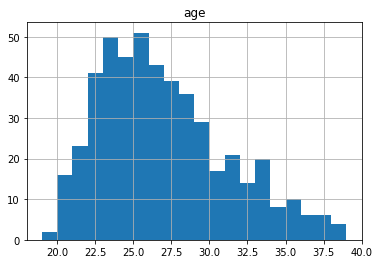

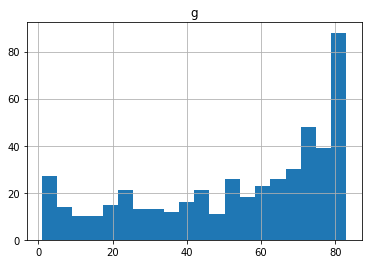

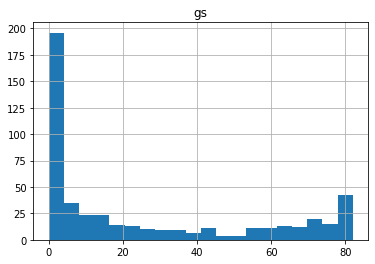

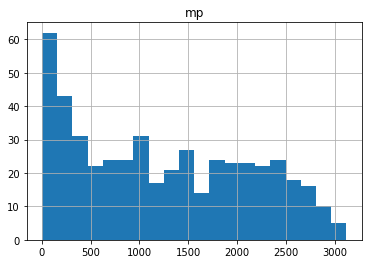

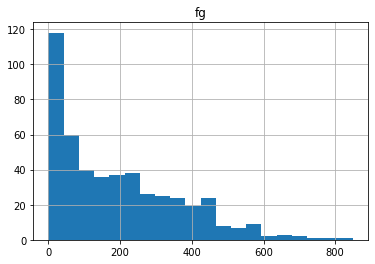

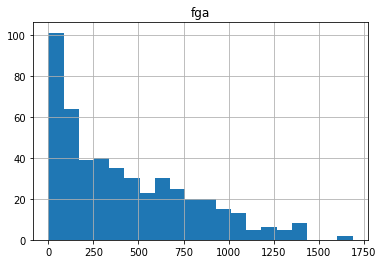

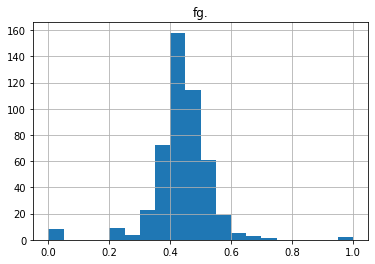

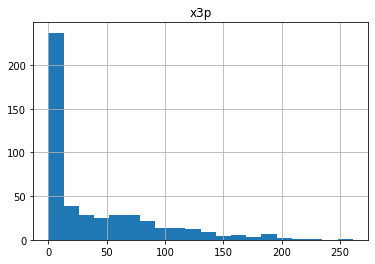

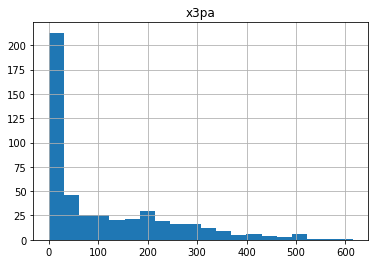

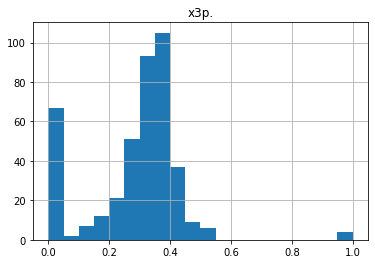

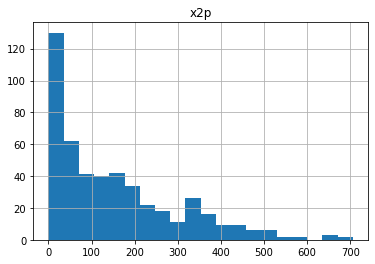

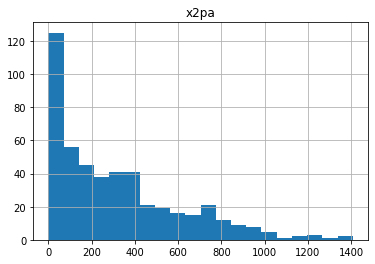

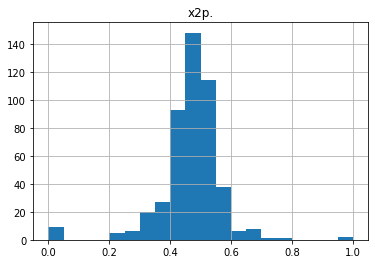

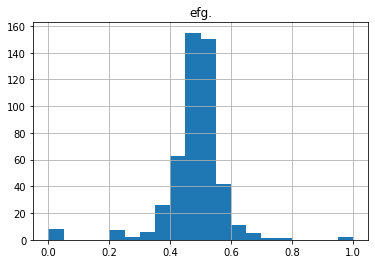

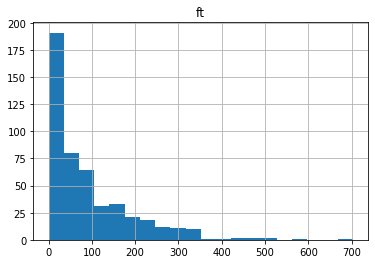

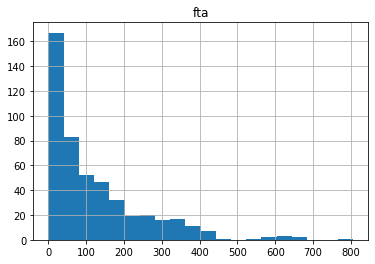

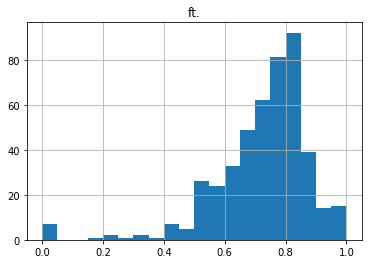

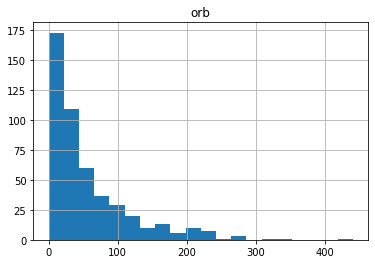

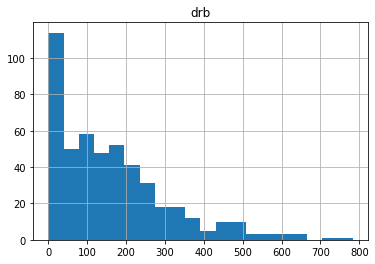

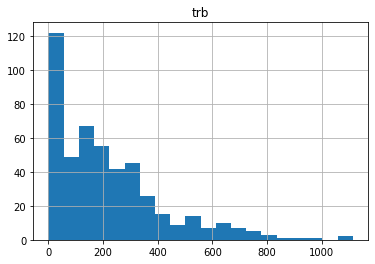

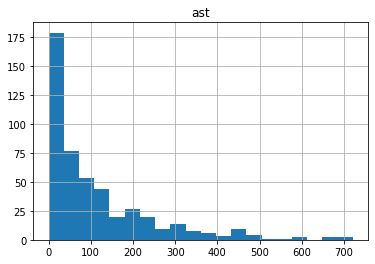

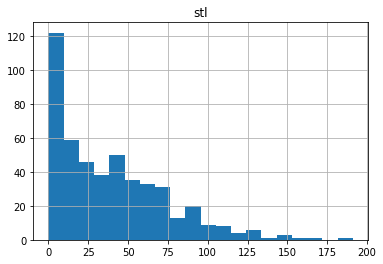

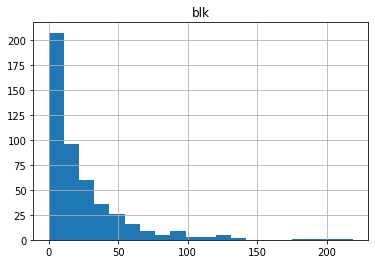

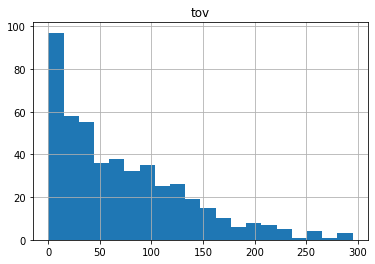

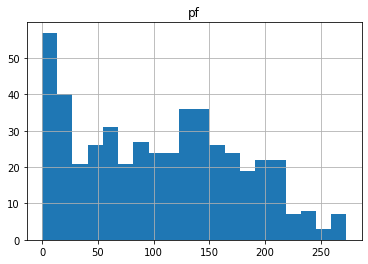

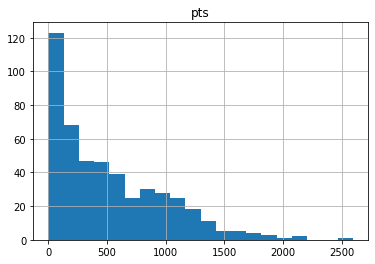

In [16]:
# To understand the distribution of the continuous variables

for feature in continuous_feat:
    data = df.copy()
    data[feature].hist(bins=20)
    plt.title(feature)
    plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


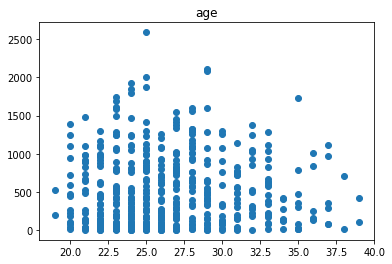

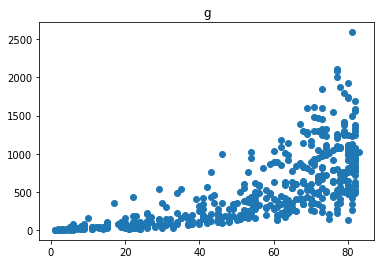

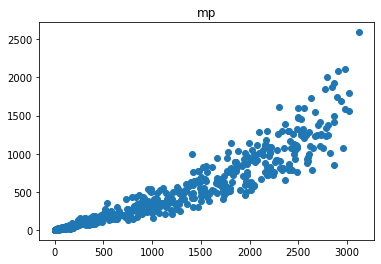

In [18]:
# To understand the relationship between continuos feature and dependent feature 'pts': scatterplot

for feature in continuous_feat:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data['pts'] = np.log(data['pts'])
        plt.scatter(df[feature], df['pts'])
        plt.title(feature)
        plt.show()

In [19]:
# Categorical Features

cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print(cat_features)

['player', 'pos', 'bref_team_id', 'season']


In [20]:
df[cat_features].head()

,player,pos,bref_team_id,season
0,Quincy Acy,SF,TOT,2013-2014
1,Steven Adams,C,OKC,2013-2014
2,Jeff Adrien,PF,TOT,2013-2014
3,Arron Afflalo,SG,ORL,2013-2014
4,Alexis Ajinca,C,NOP,2013-2014


In [21]:
for feature in cat_features:
    print('{} has {} unique categories'.format(feature, np.round(df[feature].nunique(),4)))

player has 481 unique categories
pos has 7 unique categories
bref_team_id has 31 unique categories
season has 1 unique categories


In [22]:
# As season have just one category and player name doesn't impact 'pts', we can drop the features

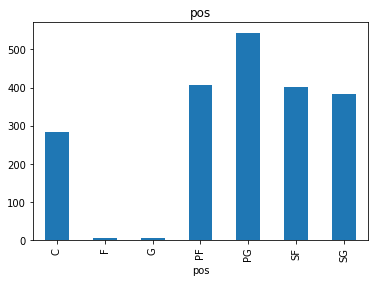

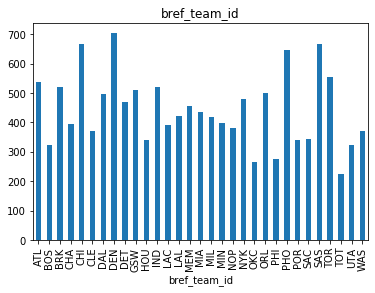

In [23]:
# To understand the relationship between categorical feature and dependent feature 'pts'
cat_features.remove('player')
cat_features.remove('season')

for feature in cat_features:
    data = df.copy()
    data.groupby(feature)['pts'].median().plot.bar()
    plt.title(feature)
    plt.show()

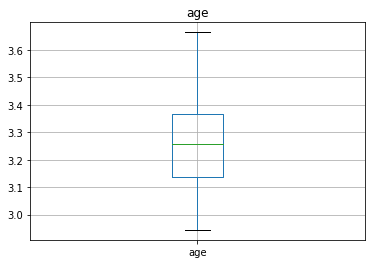

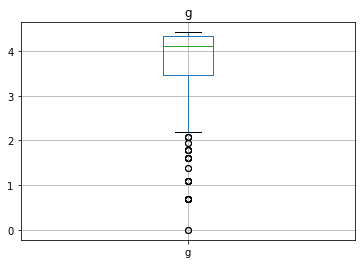

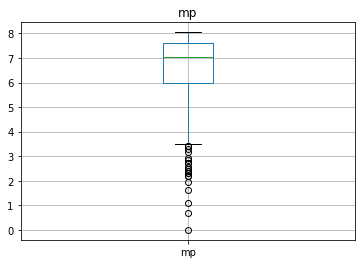

In [24]:
#Outlier Detection

for feature in continuous_feat:
    data = df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.title(feature)
        plt.show()

In [25]:
#Feature Engineering

df.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [26]:
# Dropping unnecessary features

df.drop(['player', 'season', 'season_end'], axis=1, inplace=True)

In [27]:
df.head()

,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,x3p,...,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts
0,SF,23,TOT,63,0,847,66,141,0.468,4,...,0.660,72,144,216,28,23,26,30,122,171
1,C,20,OKC,81,20,1197,93,185,0.503,0,...,0.581,142,190,332,43,40,57,71,203,265
2,PF,27,TOT,53,12,961,143,275,0.520,0,...,0.639,102,204,306,38,24,36,39,108,362
3,SG,28,ORL,73,73,2552,464,1011,0.459,128,...,0.815,32,230,262,248,35,3,146,136,1330
4,C,25,NOP,56,30,951,136,249,0.546,0,...,0.836,94,183,277,40,23,46,63,187,328


In [29]:
# Finding categorical feature with na values

[feature for feature in df.columns if df[feature].dtype =='O' and df[feature].isnull().sum()> 1]

[]

In [30]:
# Finding numerical feature with na values

feature_num_na = [feature for feature in df.columns if df[feature].dtype !='O' and df[feature].isnull().sum()> 1]
feature_num_na

['fg.', 'x3p.', 'x2p.', 'efg.', 'ft.']

In [31]:
# Imputing missing value

for feature in feature_num_na:
    median_val = df[feature].median()
    df[feature+'_nan'] = np.where(df[feature].isnull(), 1,0)
    df[feature].fillna(median_val, inplace=True)

In [32]:
df[feature_num_na].isnull().sum()

fg.     0
x3p.    0
x2p.    0
efg.    0
ft.     0
dtype: int64

In [34]:
df[cat_features].head()

,pos,bref_team_id
0,SF,TOT
1,C,OKC
2,PF,TOT
3,SG,ORL
4,C,NOP


In [41]:
#Handling Rare values

for feature in cat_features:
    temp = df[feature].value_counts()/len(df[feature])
    temp_df = temp[temp>0.02].index
    df[feature] = np.where(df[feature].isin(temp_df),df[feature],'Rare_var')

In [49]:
for feature in cat_features:
    print(feature)
    print(df[feature].unique())

pos
['SF' 'C' 'PF' 'SG' 'PG' 'Rare_var']
bref_team_id
['TOT' 'OKC' 'ORL' 'NOP' 'NYK' 'POR' 'MIA' 'MEM' 'BRK' 'PHI' 'MIL' 'ATL'
 'WAS' 'GSW' 'DEN' 'HOU' 'SAS' 'BOS' 'PHO' 'MIN' 'LAC' 'CLE' 'UTA' 'DET'
 'CHA' 'DAL' 'CHI' 'LAL' 'IND' 'TOR' 'Rare_var']


In [55]:
# One hot encoding of categorical features

df_final = df.copy()
for feature in cat_features:
    df_cat = pd.get_dummies(df[feature], drop_first=True)
    df.drop(feature, axis=1, inplace=True)
    df_final = pd.concat([df,df_cat], axis=1)

In [57]:
df_final.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ORL,PHI,PHO,POR,Rare_var,SAS,TOR,TOT,UTA,WAS
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0,0,0,0,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0,0,0,0,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,1,0,0,0,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [62]:
df_final = df_final.loc[:,~df_final.columns.duplicated()]
df_final.head()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,...,ORL,PHI,PHO,POR,Rare_var,SAS,TOR,TOT,UTA,WAS
0,23,63,0,847,66,141,0.468,4,15,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,20,81,20,1197,93,185,0.503,0,0,0.330976,...,0,0,0,0,0,0,0,0,0,0
2,27,53,12,961,143,275,0.520,0,0,0.330976,...,0,0,0,0,0,0,0,1,0,0
3,28,73,73,2552,464,1011,0.459,128,300,0.426667,...,1,0,0,0,0,0,0,0,0,0
4,25,56,30,951,136,249,0.546,0,1,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [71]:
X = df_final.drop('pts', axis=1)
y = df_final['pts']

In [72]:
# Train Test split

from sklearn.model_selection import train_test_split

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [74]:
#Feature Scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [75]:
X_train = scaler.fit_transform(X_train)

In [76]:
X_test = scaler.transform(X_test)

In [77]:
# KNN model creation

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [78]:
knn_model.score(X_test, y_test)

0.8575683950801383

In [79]:
y_pred = knn_model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [83]:
avg_error = np.sqrt(mean_squared_error(y_test, y_pred))
avg_error

184.66481137992554

In [84]:
# Error Percentage

avg_error / (np.mean(y_train) + np.std(y_train)) * 100  ##Lower Limit

18.72893881849463

In [85]:
avg_error / (np.mean(y_train) - np.std(y_train)) * 100  ##Upper Limit

308.5338193297602